In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd

# 데이터 불러오기
file_path_ts = "../data/time_series_data.csv"
df_ts = pd.read_csv(file_path_ts)


In [2]:
# 날짜 데이터를 datetime 형식으로 변환 (문자열 -> 날짜 형식으로 변경)
df_ts["Date"] = pd.to_datetime(df_ts["Date"])

# 데이터 정렬 (혹시라도 순서가 섞여 있을 경우 대비)
# # - 만약 데이터가 섞여 있다면 시간 순서대로 정렬해야 합니다.
df_ts = df_ts.sort_values(by="Date")

# 전체 데이터의 기본 통계량 확인 (데이터 분포 파악)
summary_stats = df_ts["value"].describe()

# 기본 통계량 출력
print("전체 데이터의 기본 통계량:")
print(summary_stats)

전체 데이터의 기본 통계량:
count    365.000000
mean      50.452941
std        9.976651
min       17.587327
25%       42.923305
50%       50.642800
75%       56.795977
max       88.527315
Name: value, dtype: float64


In [3]:
# 특정 기간 비교: 연초(1월)와 연말(12월)의 평균 비교
# "Date" 컬럼에서 월 정보를 추출하여 새로운 컬럼 추가
df_ts["Month"] = df_ts["Date"].dt.month

# 1월과 12월 데이터만 선택
# - 1월 데이터를 `jan_values` 변수에 저장
# - 12월 데이터를 `dec_values` 변수에 저장
jan_values = df_ts[df_ts["Month"] == 1]["value"]
dec_values = df_ts[df_ts["Month"] == 12]["value"]
# 1월과 12월의 평균 값 계산
jan_mean = jan_values.mean()
dec_mean = dec_values.mean()

# 1월과 12월 평균 출력
print("\n1월과 12월의 평균 비교:")
print(f"1월 평균: {jan_mean:.2f}")
print(f"12월 평균: {dec_mean:.2f}")


1월과 12월의 평균 비교:
1월 평균: 51.07
12월 평균: 51.06


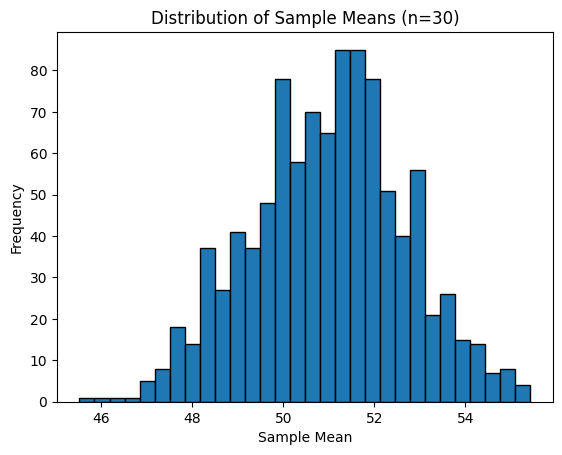

In [4]:
# 표본 평균의 분포를 살펴봅시다.
# 1월 데이터에서 표본 크기 n=30을 무작위로 여러 번 뽑아,
# 각 표본 평균을 구한 뒤 히스토그램으로 표현하세요.
# ----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

sample_means = []
for _ in range(1000):  # 1000번 반복
    sample = np.random.choice(jan_values, size=30, replace=True)  # 1월 데이터에서 표본 추출
    sample_means.append(sample.mean())  # 표본 평균 계산

plt.hist(sample_means, bins=30, edgecolor="black")
plt.title("Distribution of Sample Means (n=30)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [5]:
# 12월 데이터에서 상위 20% 값만 뽑아 평균을 구하고,
# 전체 평균과 비교해 보세요.
# 어떤 편향이 발생하는지도 함께 설명해봅시다.
# ----------------------------------------------------
threshold = np.percentile(dec_values, 80)  # 상위 20% 기준
biased_sample = dec_values[dec_values >= threshold]

biased_mean = biased_sample.mean()
true_mean = dec_values.mean()

print("\n선택 편향 시뮬레이션:")
print(f"12월 전체 평균: {true_mean:.2f}")
print(f"12월 상위 20% 평균: {biased_mean:.2f}")
print("→ 상위 데이터만 선택하면 평균이 왜곡되어 모집단을 대표하지 못하는 선택 편향 발생")


선택 편향 시뮬레이션:
12월 전체 평균: 51.06
12월 상위 20% 평균: 67.78
→ 상위 데이터만 선택하면 평균이 왜곡되어 모집단을 대표하지 못하는 선택 편향 발생
